<a href="https://colab.research.google.com/github/gabrielfea/blindview/blob/main/BlindView.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastapi uvicorn requests nest-asyncio pyngrok twilio google-cloud-texttospeech -q --upgrade

In [2]:
!pip install -q -U google-generativeai

In [3]:
import os
import nest_asyncio
import uvicorn
from fastapi import FastAPI, Request
from fastapi.responses import HTMLResponse
import requests
import base64
from twilio.rest import Client
from twilio.twiml.messaging_response import MessagingResponse
from pyngrok import ngrok
from google.cloud import texttospeech
from google.colab import userdata
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown
import PIL.Image
from PIL import Image
from io import BytesIO
import logging
import traceback

In [4]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [5]:
# Instalando ngrok para permitir o servidor rodando no colab encontrar o twlio que faz a interface com o whatsapp
key = userdata.get('NGROK_AUTH_TOKEN')
!ngrok config add-authtoken $key

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [6]:
# Configurar o authtoken do ngrok
NGROK_AUTH_TOKEN = key
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Inicializar o loop de eventos
nest_asyncio.apply()

# Configurar credenciais do Twilio
TWILIO_ACCOUNT_SID = userdata.get('TWILIO_ACCOUNT_SID')
TWILIO_AUTH_TOKEN = userdata.get('TWILIO_AUTH_TOKEN')
TWILIO_WHATSAPP_NUMBER = '+554731802531'
client = Client(TWILIO_ACCOUNT_SID, TWILIO_AUTH_TOKEN)

# Configurar cliente do Google Text-to-Speech
text_to_speech_client = texttospeech.TextToSpeechClient.from_service_account_json('drive/MyDrive/google/blindview-3d41374a7f0b.json')

app = FastAPI()

In [7]:
# Função que envia ao gemini a imagem e obtém sua descurição
async def get_image_description(img):
    GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY-L6Y')
    genai.configure(api_key=GOOGLE_API_KEY)
    model = genai.GenerativeModel('gemini-pro-vision')
    #response = model.generate_content(img)
    instrucoes = "Descreva a imagem para mim como se eu fosse deficiente visual. Devolva um texto fluido para eu transformar em audio."
    response = model.generate_content([instrucoes,img], stream=False)
    response.resolve()
    return response.text

In [8]:
# Função para converter texto em áudio usando Google TTS
async def text_to_speech(text, lang="pt-BR"):
    synthesis_input = texttospeech.SynthesisInput(text=text)
    voice = texttospeech.VoiceSelectionParams(language_code=lang, ssml_gender=texttospeech.SsmlVoiceGender.NEUTRAL)
    audio_config = texttospeech.AudioConfig(audio_encoding=texttospeech.AudioEncoding.MP3)

    response = text_to_speech_client.synthesize_speech(input=synthesis_input, voice=voice, audio_config=audio_config)

    return response.audio_content

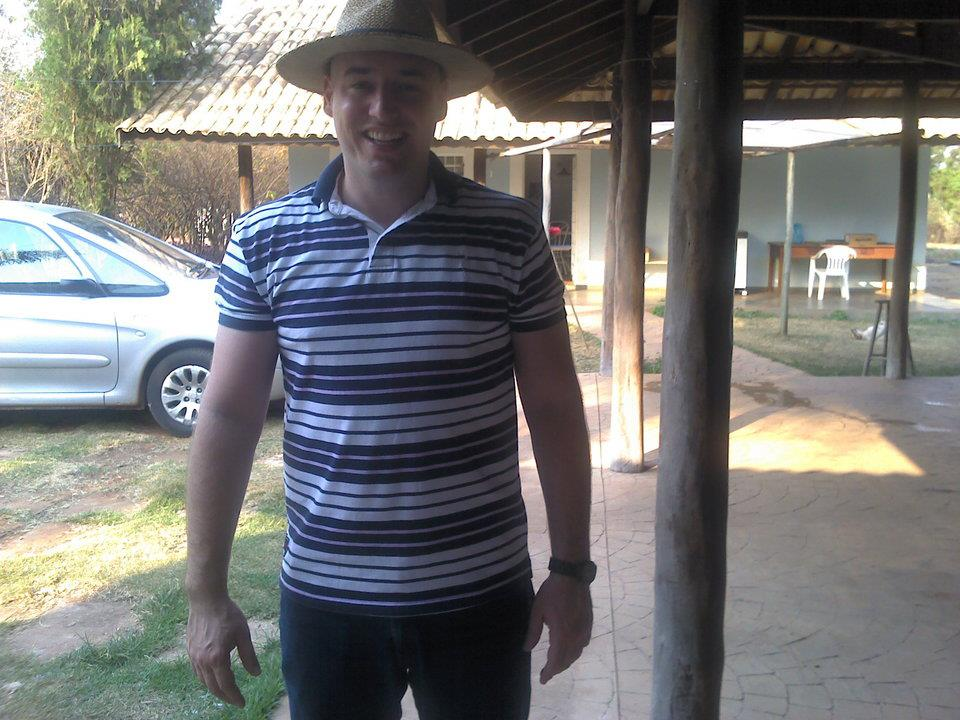

In [9]:
# Para testar gemini #1
img = PIL.Image.open("imagem1.jpg")
text = await get_image_description(img)
img

In [10]:
# Para testar TTS do Google #1
audio_content = await text_to_speech(text, lang="pt-BR")
audio_path = "imagem1.mp3"
with open(audio_path, "wb") as audio_file:
    audio_file.write(audio_content)
text

' Um homem sorridente está em pé em uma área externa coberta. Ele usa um chapéu de palha, uma camisa polo listrada azul e branca e calça jeans. Ele tem um relógio no pulso esquerdo. Ao fundo, há um carro prata estacionado e uma casa com paredes azul claro e janelas e portas brancas. O chão é de cimento e há algumas árvores verdes ao redor.'

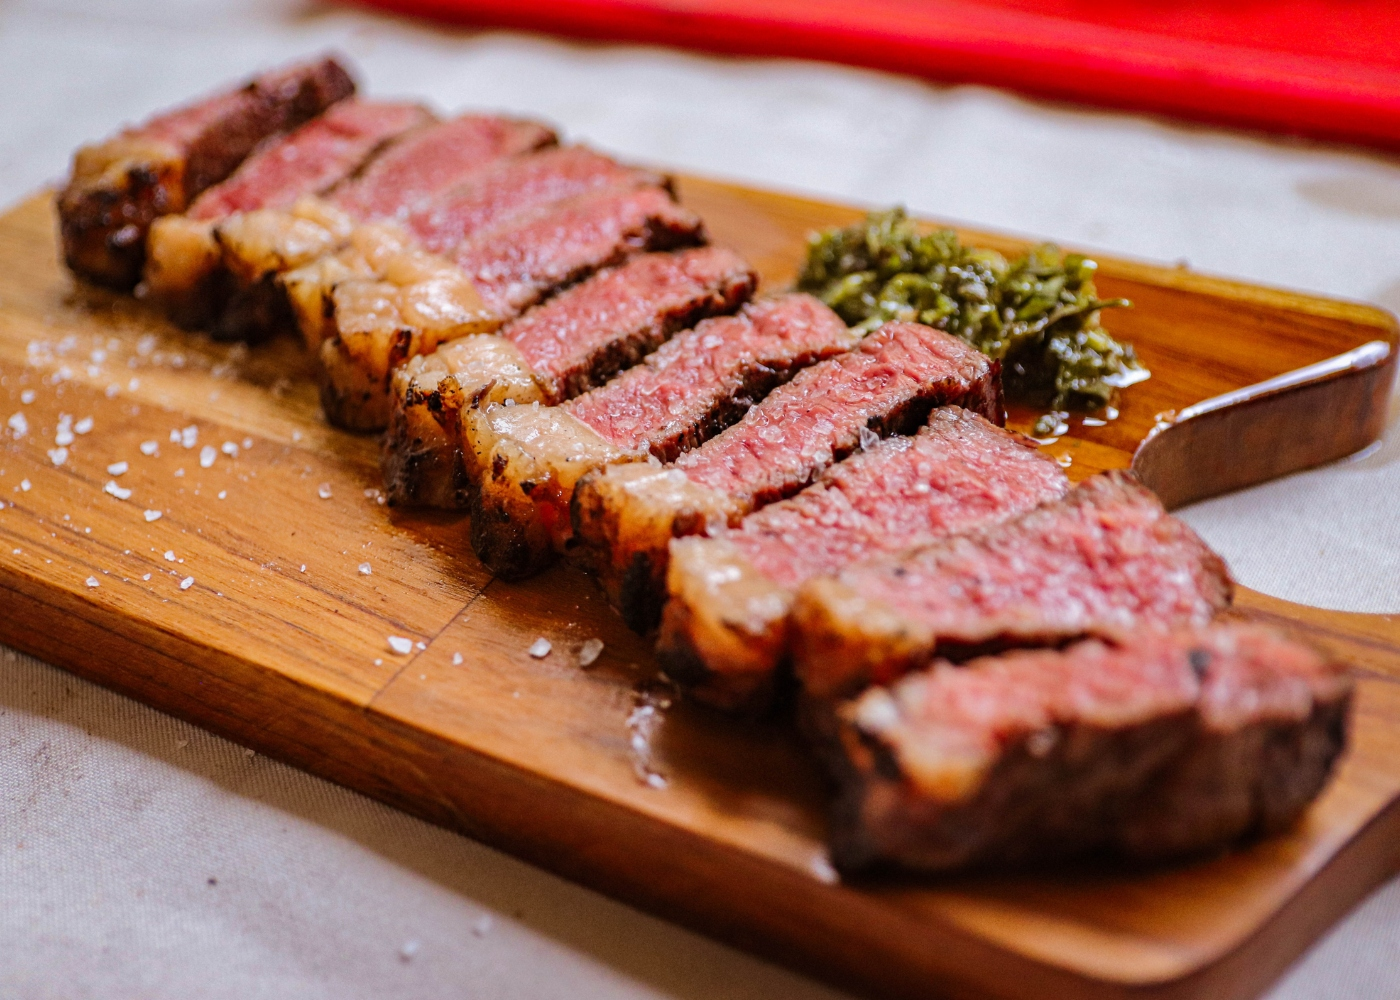

In [11]:
# Para testar gemini #2
img = PIL.Image.open("imagem2.jpg")
text = await get_image_description(img)
img

In [12]:
# Para testar TTS do Google #2
audio_content = await text_to_speech(text, lang="pt-BR")
audio_path = "imagem2.mp3"
with open(audio_path, "wb") as audio_file:
    audio_file.write(audio_content)
text

' A imagem é de um pedaço de carne vermelha grelhada, cortado em fatias finas. A carne está disposta em uma tábua de madeira, acompanhada de um molho verde. A carne é suculenta e rosada, com uma crosta dourada e crocante. O molho é feito de ervas frescas, azeite e vinagre, e tem uma textura cremosa. A tábua está apoiada sobre uma toalha branca. A imagem é de alta qualidade, com detalhes nítidos e cores vibrantes.'

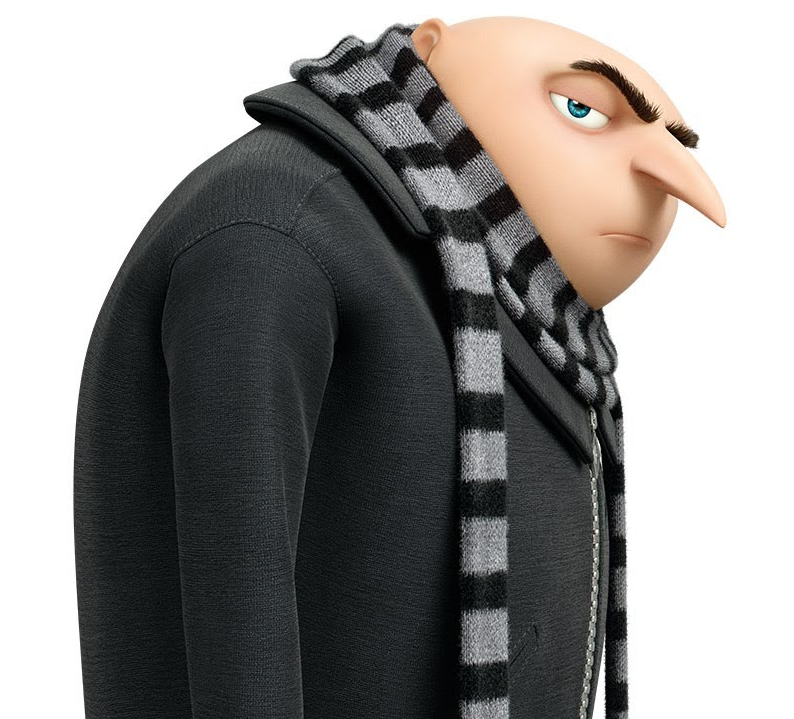

In [13]:
# Para testar gemini #3
img = PIL.Image.open("imagem3.png")
text = await get_image_description(img)
img

In [14]:
# Para testar TTS do Google #3
audio_content = await text_to_speech(text, lang="pt-BR")
audio_path = "imagem3.mp3"
with open(audio_path, "wb") as audio_file:
    audio_file.write(audio_content)
text

' O personagem tem um grande nariz, olhos azuis e usa um casaco preto com uma longaマフラー🧣 listrada em preto e cinza. Ele tem uma expressão séria no rosto.'

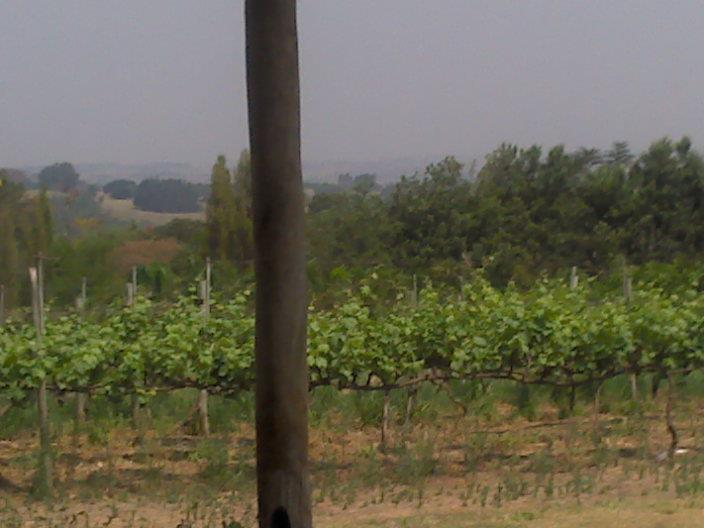

In [15]:
# Para testar gemini #4
img = PIL.Image.open("imagem4.jpg")
text = await get_image_description(img)
img

In [16]:
# Para testar TTS do Google #4
audio_content = await text_to_speech(text, lang="pt-BR")
audio_path = "imagem4.mp3"
with open(audio_path, "wb") as audio_file:
    audio_file.write(audio_content)
text

' A imagem mostra um vinhedo com uma fileira de videiras no primeiro plano. As videiras são verdes e estão carregadas de uvas. Ao fundo, há uma paisagem de montanhas cobertas de árvores. O céu está nublado.'

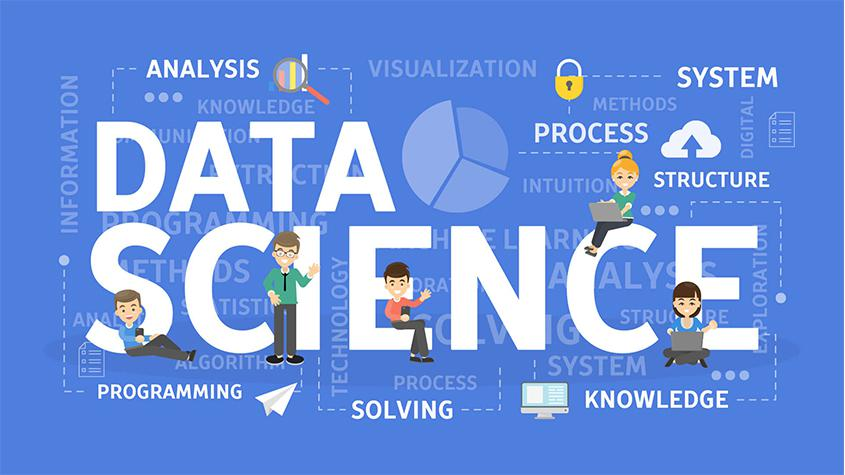

In [17]:
# Para testar gemini #5
img = PIL.Image.open("imagem5.jpg")
text = await get_image_description(img)
img

In [18]:
# Para testar TTS do Google #5
audio_content = await text_to_speech(text, lang="pt-BR")
audio_path = "imagem5.mp3"
with open(audio_path, "wb") as audio_file:
    audio_file.write(audio_content)
text

' A imagem mostra a palavra "Data Science" em letras brancas. As letras estão dispostas em um círculo, com a palavra "Data" na parte superior, "Science" na parte inferior e as palavras "Analytics", "Visualization" e "System" nas laterais. Dentro do círculo, há várias pessoas trabalhando em computadores. Há uma mulher sentada em uma cadeira, usando um laptop. Há um homem de pé, olhando para um computador. Há outra mulher sentada em uma mesa, usando um computador. E há um quarto homem sentado em uma cadeira, usando um laptop. A imagem é colorida e usa um estilo cartoon.'

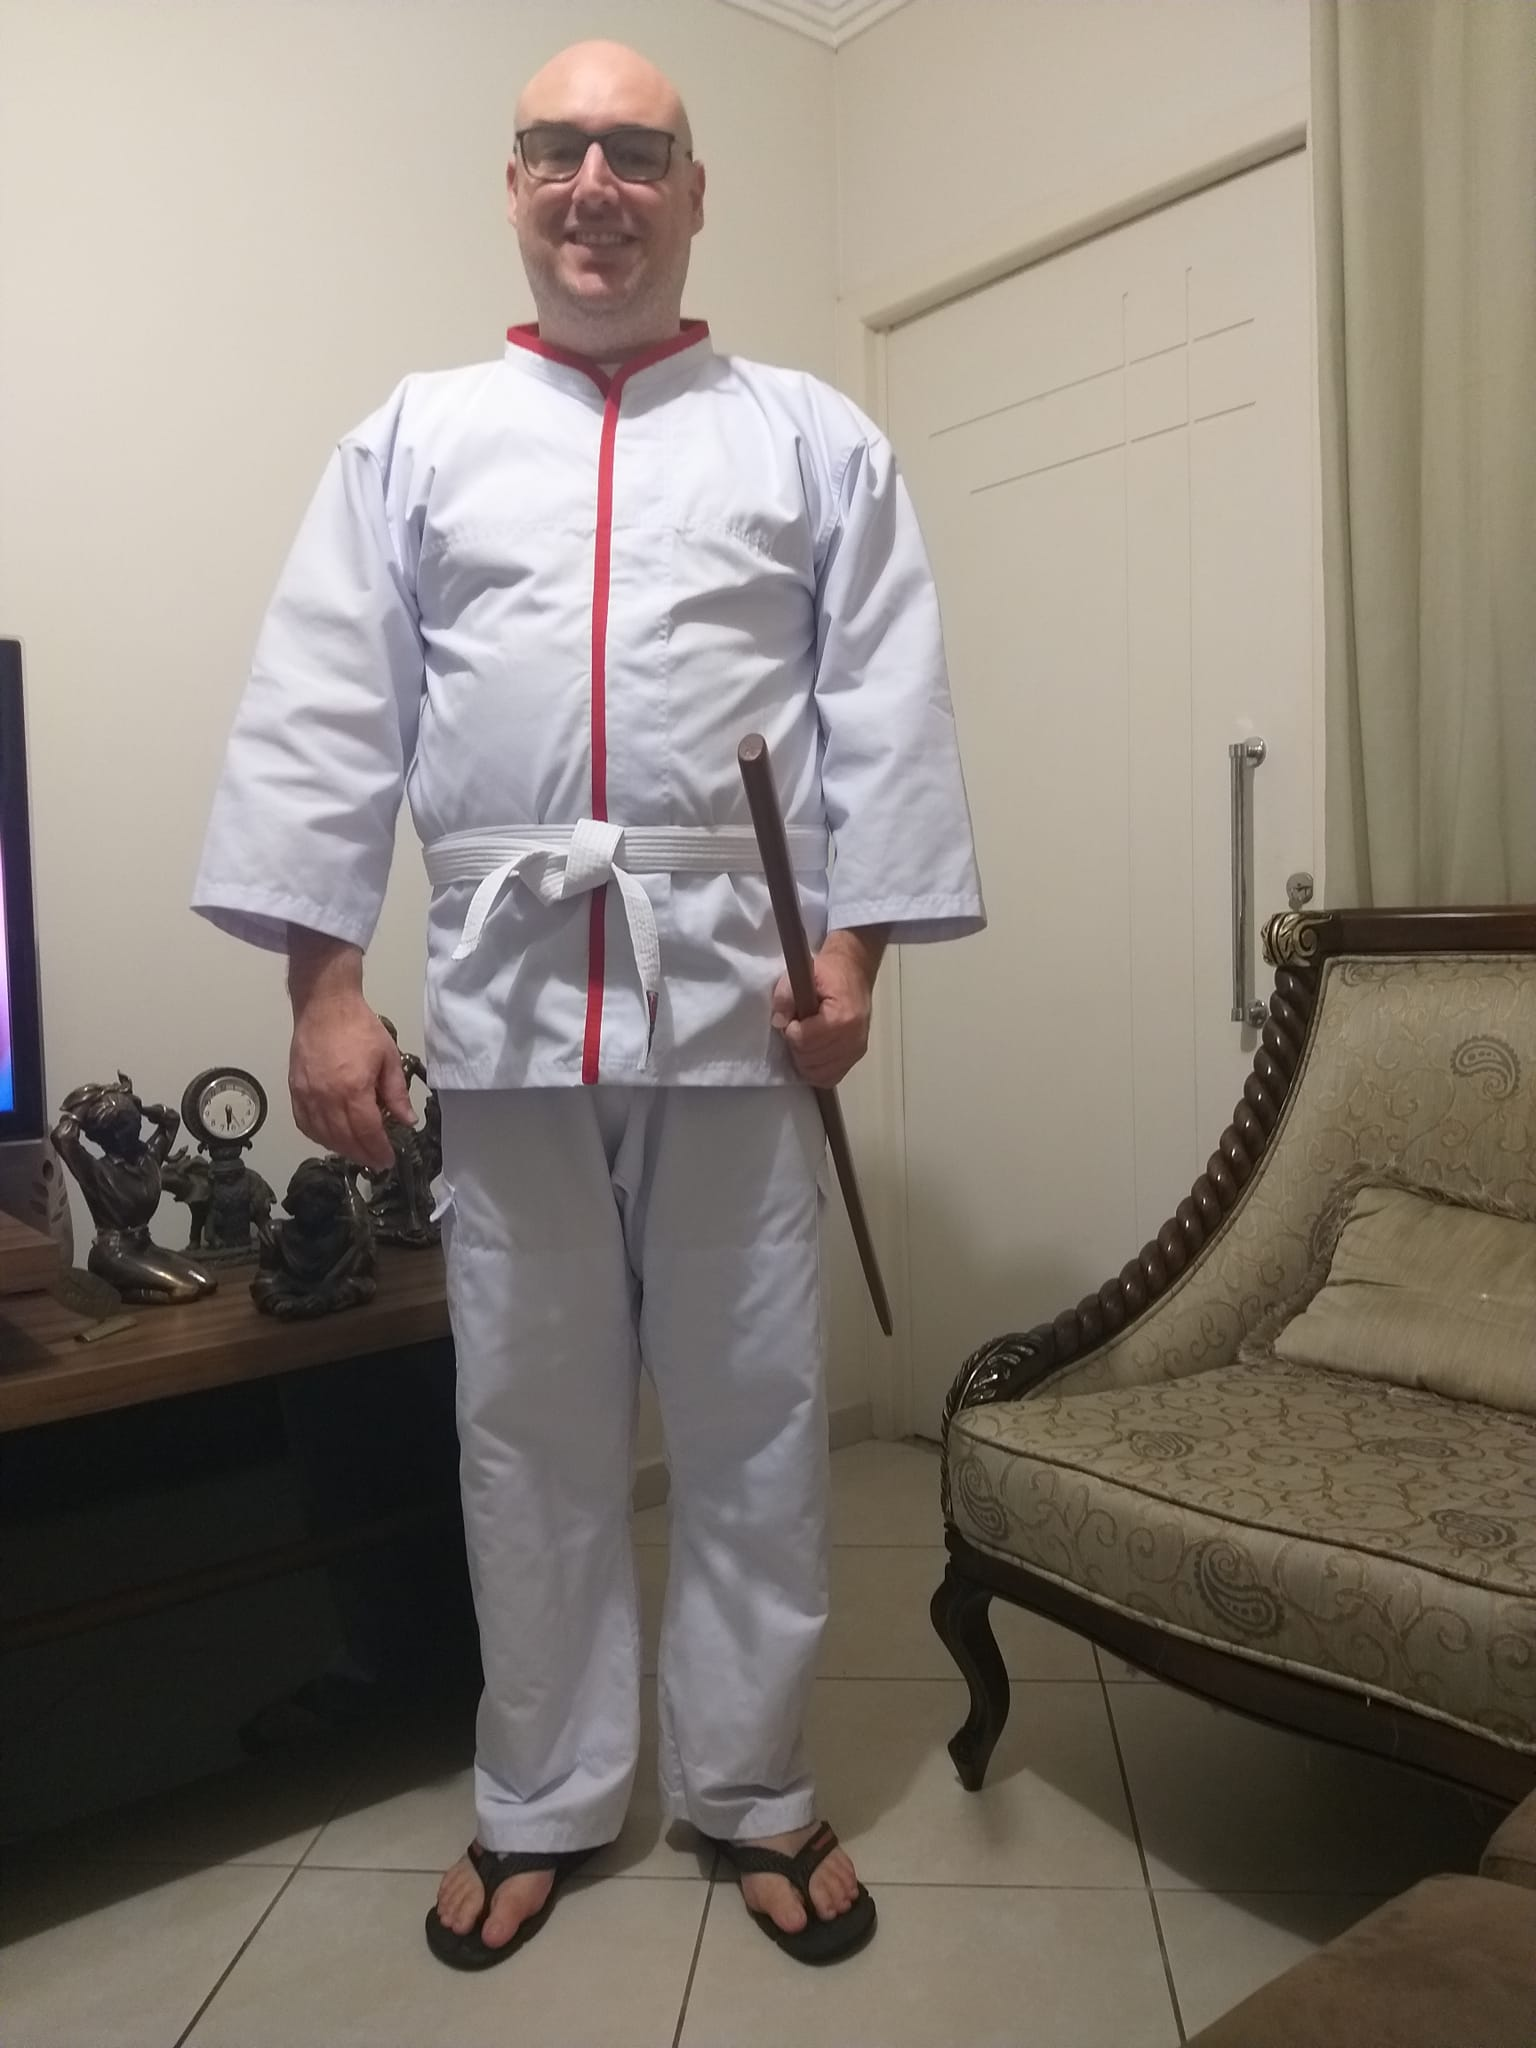

In [19]:
# Para testar gemini #6
img = PIL.Image.open("imagem6.jpg")
text = await get_image_description(img)
img

In [20]:
# Para testar TTS do Google #6
audio_content = await text_to_speech(text, lang="pt-BR")
audio_path = "imagem6.mp3"
with open(audio_path, "wb") as audio_file:
    audio_file.write(audio_content)
text

' Um homem está em pé, em uma sala, vestindo um quimono branco com detalhes vermelhos e uma faixa branca na cintura. Ele segura um bastão de madeira nas mãos. O homem tem a cabeça raspada e usa óculos. Ele está descalço e usa um par de chinelos pretos. Atrás dele há uma porta branca e um sofá marrom.'

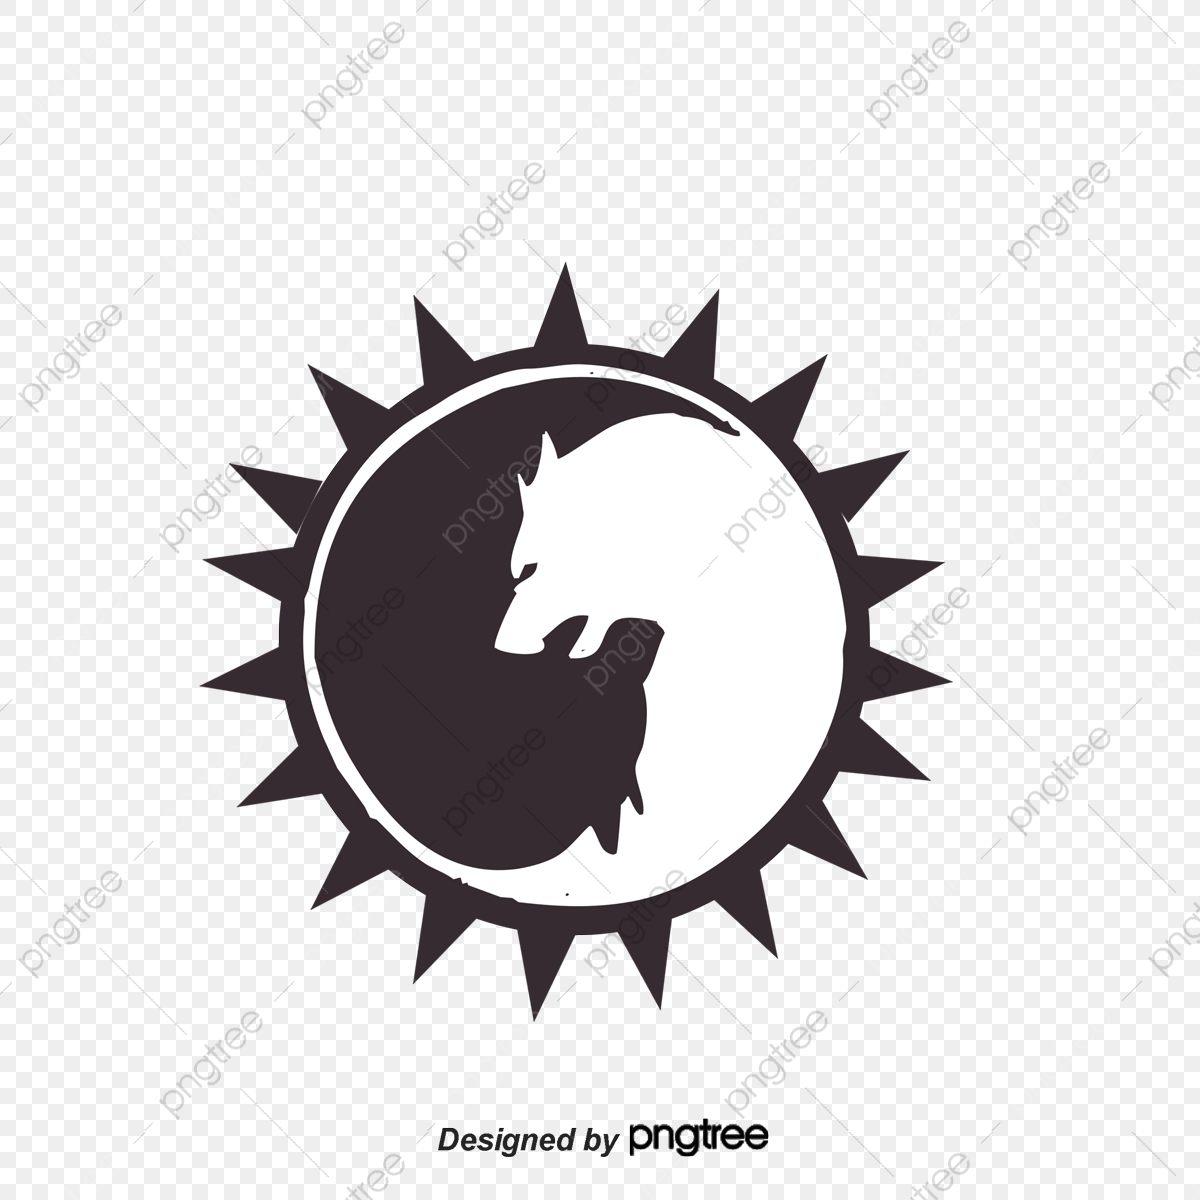

In [21]:
# Para testar gemini #7
img = PIL.Image.open("imagem7.jpg")
text = await get_image_description(img)
img

In [22]:
# Para testar TTS do Google #7
audio_content = await text_to_speech(text, lang="pt-BR")
audio_path = "imagem7.mp3"
with open(audio_path, "wb") as audio_file:
    audio_file.write(audio_content)
text

' A imagem é um círculo dividido em duas metades, uma metade é branca e a outra é preta. Na metade branca há o desenho de um lobo e na metade preta há o desenho de um cachorro. O círculo está rodeado por espinhos.'

In [23]:
# Configurar logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [24]:
@app.post("/whatsapp")
async def whatsapp_webhook(request: Request):
    try:
        logging.info("Recebendo solicitação do WhatsApp webhook.")
        form = await request.form()
        logging.info(f"Form data received: {form}")

        media_url = form.get('MediaUrl0')
        from_number = form.get('From')

        if media_url:
            logging.info(f"Media URL received: {media_url}")
            response = requests.get(media_url)
            response.raise_for_status()
            logging.info("Imagem baixada com sucesso.")

            image = Image.open(BytesIO(response.content))
            image = image.convert("RGB")
            logging.info("Imagem convertida para RGB com sucesso.")

            description_text = await get_image_description(image)
            logging.info(f"Descrição da imagem: {description_text}")

            # Convertendo a descrição em áudio
            audio_content = await text_to_speech(description_text)
            audio_path = f"{from_number[-13:]}.mp3"
            with open(audio_path, "wb") as audio_file:
                audio_file.write(audio_content)
            logging.info(f"Áudio salvo em {audio_path}.")

            # Enviar áudio de volta pelo WhatsApp
            client.messages.create(
                body=description_text,
                from_='whatsapp:+554731802531',
                to=from_number,
                media_url=[f"{public_url}/{audio_path}"]
            )
            logging.info("Mensagem enviada com sucesso pelo Twilio.")

            resp = MessagingResponse()
            resp.message(body="A descrição em áudio foi enviada.", to=from_number)
            logging.info("Resposta enviada para o usuário.")
            return HTMLResponse(content=str(resp), status_code=200)
        else:
            resp = MessagingResponse()
            resp.message(body="Por favor, envie uma imagem.", to=from_number)
            logging.warning("Nenhuma URL de mídia fornecida.")
            return HTMLResponse(content=str(resp), status_code=200)
    except requests.exceptions.RequestException as e:
        logging.error(f"Erro ao fazer download da imagem: {e}")
        return HTMLResponse(content=f"Erro ao fazer download da imagem: {e}", status_code=500)
    except Exception as e:
        logging.error(f"Erro ao processar a solicitação: {e}")
        logging.error(traceback.format_exc())  # Adicionando o stack trace completo ao log
        return HTMLResponse(content=f"Erro ao processar a solicitação: {e}", status_code=500)

# Comentando o código ngrok e webhook temporariamente
# Criar um túnel para a aplicação com ngrok
http_tunnel = ngrok.connect(8000, bind_tls=True)
public_url = http_tunnel.public_url
print(f"Public URL: {public_url}")

# Configurar webhook do Twilio
whatsapp_webhook_url = f"{public_url}/whatsapp"
incoming_phone_numbers = client.incoming_phone_numbers.list(phone_number=TWILIO_WHATSAPP_NUMBER)

if incoming_phone_numbers:
    incoming_phone_numbers[0].update(voice_url=whatsapp_webhook_url)
else:
    print("Nenhum número de telefone encontrado para o número de WhatsApp especificado.")

Public URL: https://5ab7-35-231-14-13.ngrok-free.app
Nenhum número de telefone encontrado para o número de WhatsApp especificado.


In [25]:
# Executar o servidor
def run():
    uvicorn.run(app, host="0.0.0.0", port=8000)

run()

INFO:     Started server process [196933]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     54.83.180.160:0 - "POST /whatsapp HTTP/1.1" 200 OK
INFO:     44.202.9.65:0 - "GET /5521995642407.mp3 HTTP/1.1" 404 Not Found
INFO:     2804:14c:f281:80fc::a7e7:0 - "GET /5521995642407.mp3 HTTP/1.1" 404 Not Found
INFO:     2804:14c:f281:80fc::a7e7:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [196933]


KeyboardInterrupt: 